# Stemming

Comprender el proceso de derivación requiere comprender qué representan las raíces de las palabras. Recuerdan los **morfemas**, la unidad independiente más pequeña en cualquier lenguaje natural?. Los morfemas consisten en unidades que son raíces y afijos. 

Los **afijos** son unidades como prefijos, sufijos, etc., que se adjuntan a la raíz de una palabra para cambiar su significado o crear una palabra completamente nueva. 

Las **raíces** de las palabras también se conocen a menudo como la forma base de una palabra, y podemos crear nuevas palabras añadiéndoles afijos en un proceso conocido como **inflexión**. Lo contrario de esto es obtener la forma básica de una palabra a partir de su forma flexionada, y esto se conoce como **derivación**.

Piensa en la palabra JUMP. Puedes agregarle afijos y formar nuevas palabras como JUMPS, JUMPED y JUMPING. En este caso, la palabra base JUMP es la palabra stem o raíz. Si realizáramos el *Stemming* en cualquiera de sus tres formas flexionadas, recuperaríamos la forma base. 

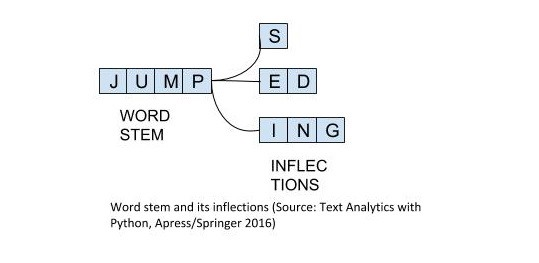

La figura muestra cómo la palabra raíz está presente en todas sus flexiones ya que forma la base sobre la cual se construye cada flexión usando afijos. El *Stemming* nos ayuda a estandarizar las palabras en su raíz base, independientemente de sus inflexiones, lo que ayuda a muchas aplicaciones, como clasificar o agrupar texto, e incluso en la recuperación de información. Los motores de búsqueda hacen un uso extensivo de estas técnicas para ofrecer resultados mejores y más precisos, independientemente de la forma de la palabra.

La librería *nltk* tiene varias implementaciones para lematizadores. Estos lematizadores se implementan en el módulo stem, que hereda la interfaz `StemmerI` de la API `nltk.stem.api`. Incluso puedes crear tu propio lematizador usando esta clase (técnicamente es una interfaz) como tu clase base. Uno de los lematizadores más populares es el Stemming de Porter, que se basa en el algoritmo desarrollado por el Dr. Martin Porter. Originalmente, se dice que el algoritmo tenía un total de cinco fases diferentes para la reducción de las inflexiones en sus tallos, donde cada fase tiene su propio conjunto de reglas. También existe un algoritmo Porter2, que era el algoritmo de derivación original con algunas mejoras sugeridas por el Dr. Porter. 

In [1]:
# Porter Stemmer
from nltk.stem import PorterStemmer
ps = PorterStemmer()

ps.stem('jumping'), ps.stem('jumps'), ps.stem('jumped')

('jump', 'jump', 'jump')

In [2]:
ps.stem('lying')

'lie'

In [3]:
ps.stem('strange')

'strang'

El Stemmer de Lancaster se basa en el algoritmo de Lancaster, también conocido como Stemmer de Paice/Husk, inventado por Chris D. Paice. Usa un proceso iterativo que tiene más de 120 reglas que especifican la eliminación o el reemplazo específico de afijos para obtener las raíces de las palabras. El siguiente fragmento muestra el stemmer de Lancaster en acción:

In [6]:
# Lancaster Stemmer
from nltk.stem import LancasterStemmer
ls = LancasterStemmer()
ls.stem('jumping'), ls.stem('jumps'), ls.stem('jumped')

('jump', 'jump', 'jump')

In [8]:
ls.stem('lying')

'lying'

Puede ver que el comportamiento de este Stemmer es diferente al de Porter. Hay varios otros Stemmers, incluido *RegexpStemmer*, donde puede crear su propio Stemmer basado en reglas definidas por el usuario, y *SnowballStemmer*, que admite lematización en 13 idiomas diferentes además del inglés.

El RegexpStemmer usa expresiones regulares para identificar los afijos morfológicos en las palabras, y cualquier parte de la cadena que coincida con la misma se elimina:

In [9]:
# Regex based stemmer
from nltk.stem import RegexpStemmer
rs = RegexpStemmer('ing$|s$|ed$', min=4)
rs.stem('jumping'), rs.stem('jumps'), rs.stem('jumped')

('jump', 'jump', 'jump')

In [10]:
rs.stem('lying')

'ly'

Para el español existe una alternativa que se llama Snowball

In [4]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("spanish")
word = "corriendo"
stemmed_word = stemmer.stem(word)
print(stemmed_word) 

corr


In [5]:
words = ["corriendo", "corrió", "corre"]
stemmed_words = [stemmer.stem(word) for word in words]
print(stemmed_words)

['corr', 'corr', 'corr']


In [11]:
from nltk.stem import SnowballStemmer
ss = SnowballStemmer("german")
print('Supported Languages:', SnowballStemmer.languages)

Supported Languages: ('arabic', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'hungarian', 'italian', 'norwegian', 'porter', 'portuguese', 'romanian', 'russian', 'spanish', 'swedish')


In [12]:
ss.stem('springen')

'spring'

In [14]:
import nltk
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

simple_stemmer("My system keeps crashing his crashed yesterday, ours crashes daily")

'my system keep crash hi crash yesterday, our crash daili'

# Lemantizacion

El proceso de lematización es muy similar al Stemming: se eliminan los afijos de las palabras para llegar a la forma base de la palabra. Pero en este caso, esta forma base también se conoce como palabra raíz. La **diferencia es que la raíz puede no ser siempre una palabra lexicográficamente correcta**; es decir, puede no estar presente en el diccionario. La raíz de la palabra, también conocida como **lema**, siempre estará presente en el diccionario.

El proceso de lematización es considerablemente más lento que la stemming porque implica un paso adicional en el que se forma la raíz o el lema eliminando el afijo de la palabra si y solo si el lema está presente en el diccionario. El paquete nltk tiene un módulo de lematización robusto que usa **WordNet** y la sintaxis y semántica de la palabra, como parte del discurso y contexto, para obtener la palabra raíz o lema. ¿Recuerdas las partes del discurso del Capítulo 1? Había principalmente tres entidades (sustantivos, verbos y adjetivos) que ocurren con mayor frecuencia en el lenguaje natural.

In [15]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
# lemmatize pronombres
print(wnl.lemmatize('cars', 'n'))
print(wnl.lemmatize('men', 'n'))

car
men


In [16]:
# lemmatize verbos
print(wnl.lemmatize('running', 'v'))
print(wnl.lemmatize('ate', 'v'))

run
eat


In [17]:
# lemmatize adjetivos
print(wnl.lemmatize('saddest', 'a'))
print(wnl.lemmatize('fancier', 'a'))

sad
fancy


In [18]:
# ineffective lemmatization
print(wnl.lemmatize('ate', 'n'))
print(wnl.lemmatize('fancier', 'v'))

ate
fancier


In [24]:
!python -m spacy download es_core_news_md
# python -m spacy download es_core_news_lg

     ---------------------------------------- 42.3/42.3 MB 6.8 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('es_core_news_md')


2023-01-22 12:05:40.037390: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-01-22 12:05:40.037448: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-22 12:05:46.269597: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2023-01-22 12:05:46.269642: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-22 12:05:46.273908: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: DESKTOP-G61012J
2023-01-22 12:05:46.274013: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: DESKTOP-G61012J


In [25]:
# En español
import spacy
#Cargams el procesador de texto
nlp = spacy.load("es_core_news_md")
# Definimos la funcion para lemantizar
def lemmatize(word):
    doc = nlp(word)
    lemma = doc[0].lemma_
    return lemma
# Aplicar
word = "corriendo"
lemma = lemmatize(word)
print(lemma)

correr


In [26]:
words = ["corriendo", "corrió", "corre"]
lemmas = [lemmatize(word) for word in words]
print(lemmas)

['correr', 'correr', 'correr']


Ahora creemos una funcion para aplicar sobre un dataframe

In [27]:
#!python -m spacy download en_core_web_md
import en_core_web_md
nlp_2 = en_core_web_md.load(disable=['parser', 'ner'])

In [39]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def funcion_lemantizadora(df, text_col):
    '''
    df_clean= dataframe with messages
    text_col= column with text
    '''
    start_time = time.time()  #  begins time 
    df_clean = df[df[text_col].notnull()] # Removiendo nulos
    df_clean.reset_index(drop=True, inplace=True) # reset del indice
    pre_process_lambda = lambda text: ' '.join([word.lemma_ for word in nlp_2(' '.join([word for word in nltk.RegexpTokenizer(r"[a-zÀ-ÿ]+").tokenize(str(text).lower()) if word not in stop_words]))])
    df_clean[text_col] = df_clean[text_col].apply(pre_process_lambda)
    elapsed_time = time.time() - start_time
    print("Time elapsed: ", elapsed_time) # Report time for the function
    return df_clean

In [36]:
import pandas as pd
df= pd.DataFrame()
df['MESSAGE']=['Hi how are you today?',' What if we are going to work today','Lets try another method',\
              'What if we meet at 5pm','Well I am just wondering','Please be careful with my whispers']
df

,MESSAGE
0,Hi how are you today?
1,What if we are going to work today
2,Lets try another method
3,What if we meet at 5pm
4,Well I am just wondering
5,Please be careful with my whispers


In [40]:
import time
funcion_lemantizadora(df=df, text_col='MESSAGE')

Time elapsed:  0.05560946464538574


,MESSAGE
0,hi today
1,go work today
2,let try another method
3,meet pm
4,well wonder
5,please careful whisper
